In [1]:
#Zadanie 14
#hiperboliczna funkcja sklejana interpolacyjna (tension spline)
#Dawid Więcław
#Interpolowana funkcja to f(x) która jest zdefiniowana globalnie
#Do interpolacji należy utworzyć tablicę M o n+1 elementach (pustą), a także tablicę X z argumentami
#w których nastąpi interpolacja
#funkcja f musi być zdefiniowana tak aby w każdym z X[i] zwracała ona wartość
#Następnie należy wywołać funkcję fillM(), która uzupełni globalnie utworzoną tablicę M
#Hiperbliczna funkcja interpolacyjna to Sr(x) i można ją wywołać dla dowolnego argumentu
#Dla argumentu spoza zakresu zwraca ona wartosć odpowiednio jak na ostatnim lub pierwszym przedziale

In [3]:
#Funkcje pomocnicze

using Plots
function gamma(i::Integer)
    return BigFloat((f(X[i+2])-f(X[i+1]))/h(i))
end

function h(k::Integer)
    return BigFloat(X[k+2]-X[k+1])
end

function sinh(x)
    return BigFloat((Base.MathConstants.ℯ^x-Base.MathConstants.ℯ^(-x))/2.0)
end

function cosh(x)
    return BigFloat((Base.MathConstants.ℯ^x+Base.MathConstants.ℯ^(-x))/2.0)
end

function alpha(i)
    return BigFloat((1.0/h(i))-r/sinh(r*h(i)))
end

function beta(i)
    return BigFloat(r*cosh(r*h(i))/sinh(r*h(i))-1.0/h(i))
end

function y(i)
    return gamma(i)-gamma(i-1)
end

#Funcja znajduąca przedział w którym znajduje się x (xk<x<x(k+1))
#Zwraca -1 w przypadku x spoza przedziału
function findXi(x)
    if x<X[1] 
        return 0
    end
    if x>X[n] 
        return n-1
    end
    for i=2:n+1
        if x<=X[i] && x>=X[i-1]
            return i-2
        end
    end
end

findXi (generic function with 1 method)

In [4]:
#Funkcja uzupełniająca tablicę pomocniczna Y potrzebną do wyliczenia wartości tablicy M
function fillY(Y)
    for i=1:n-1
        Y[i]=y(i)
    end
    return Y
end

fillY (generic function with 1 method)

In [5]:
#Funkcja uzupełniająca tablicę pomocniczna T potrzebną do wyliczenia wartości tablicy M
function fillT(T)
    i=1
    a=1
    b=1
    
    while i<=2*n-3
        T[i]=beta(b-1)+beta(b)
        
        if i!=2*n-3
            T[i+1]=alpha(a)
        end
        
        a+=1 
        b+=1 
        i+=2 
    end
    
    return T
end

fillT (generic function with 1 method)

In [6]:
#Zmodyfikowana metoda eliminacji Gaussa dla przypadku układu równań występującego w zadaniu
#Czas działania algorytmu wynosi O(n)
function fixedGauss(T,Y)
    i=2
    while i<2*n-3
        Y[Integer(i/2)]*=T[i]/T[i-1]
        T[i]*=T[i]/T[i-1]
        Y[Integer(i/2)+1]-=Y[Integer(i/2)]
        T[i+1]-=T[i]
        i+=2
    end
    #Z założeń zadania pierwszy i ostatani element tablicy M jest równy 0
    M[n+1]=0
    M[n]=Y[n-1]/T[2*n-3]
    M[1]=0
end

fixedGauss (generic function with 1 method)

In [7]:
#Funkcja wypełniająca tablicę M
function fillM()#w czasie liniowym wyprowadzenie algorytm testy oszacowanie bledu
    T=Array{BigFloat,1}(undef, 2*n-3)
    Y=Array{BigFloat,1}(undef, n-1)

    Y=fillY(Y)
    T=fillT(T)
    println(T)
    fixedGauss(T,Y)

    Y=fillY(Y)
    T=fillT(T)
    i=n-1
    while i>1
        M[i]=(Y[i-1]-T[2*(i-1)]*M[i+1])/T[2*(i-1)-1]
        i-=1
    end
end

fillM (generic function with 1 method)

In [8]:
#hiperboliczna funkcja sklejana interpolacyjna
function Sr(x)
    k=findXi(x)

    a = M[k+1]*sinh(r*(BigFloat(X[k+2])-x))/sinh(r*h(k))
    b = M[k+2]*sinh(r*(x-BigFloat(X[k+1])))/sinh(r*h(k))
    c = (f(X[k+1])-M[k+1])*(BigFloat(X[k+2])-x)/h(k)
    d = (f(X[k+2])-M[k+2])*(x-BigFloat(X[k+1]))/h(k)
    
    result = a+b+c+d
    return result
end

Sr (generic function with 1 method)

In [9]:
function f(x)
    return C[x+1]
end

f (generic function with 1 method)

BigFloat[1.85e+01, 5.0e-01, 1.925e+01, 2.5e-01, 1.95e+01, 2.5e-01, 1.875e+01, 9.99092e-01, 1.8e+01, 9.99092e-01, 1.85e+01, 5.0e-01, 1.925e+01, 2.5e-01, 1.875e+01, 9.99092e-01, 1.8e+01, 9.99092e-01, 1.8e+01]
BigFloat[9.98007e-03, 3.31784e-03, 1.98422e-02, 6.54429e-03, 2.63865e-02, 6.54429e-03, 1.65244e-02, 1.66472e-03, 6.66223e-03, 1.66472e-03, 9.98007e-03, 3.31784e-03, 1.98422e-02, 6.54429e-03, 1.65244e-02, 1.66472e-03, 6.66223e-03, 1.66472e-03, 6.66223e-03]


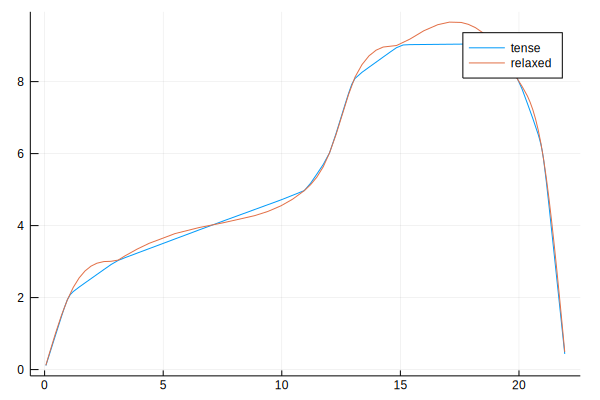

In [10]:
#przykład1
C=[0,2,0,3,0,0,0,4,0,0,0,5,6,8,0,9,0,0,0,9,8,6,0]
X=[0,1,3,7,11,12,13,15,19,20,21,22]
n=11
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
fn=plot(Sr, 0, 22, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 22, label="relaxed")

BigFloat[1.8e+01, 9.99092e-01, 1.8e+01]
BigFloat[6.66223e-03, 1.66472e-03, 6.66223e-03]


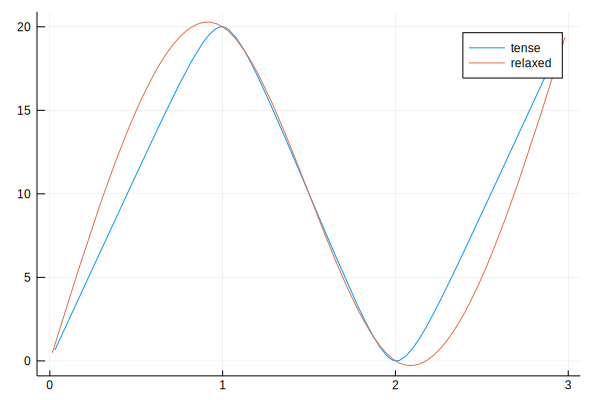

In [11]:
#przyklad2
C=[0,20,0,20]
X=[0,1,2,3]
n=3
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
plot(Sr, 0, 3, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 3, label="relaxed")

In [12]:
function f(x)
    #return C[x+1]
    return BigFloat(Base.MathConstants.ℯ^(x))
end

f (generic function with 1 method)

BigFloat[1.8e+01, 9.99092e-01, 1.86667e+01]
BigFloat[6.66223e-03, 1.66472e-03, 1.32716e-02]


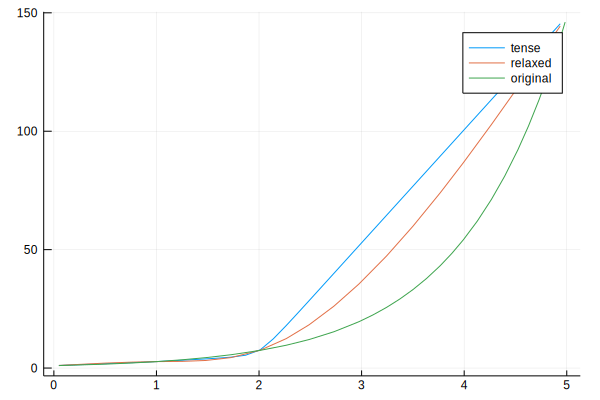

In [13]:
#przyklad3
X=[0,1,2,5]
n=3
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
plot(Sr, 0, 5, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 5, label="relaxed")
plot!(f, 0, 5, label="original")

In [14]:
function f(x)
    return sind(x)
end

f (generic function with 1 method)

BigFloat[1.99778e+01, 1.11111e-02, 1.99778e+01, 1.11111e-02, 1.99778e+01]
BigFloat[1.77778e-01, 1.10864e-02, 1.77778e-01, 1.10864e-02, 1.77778e-01]


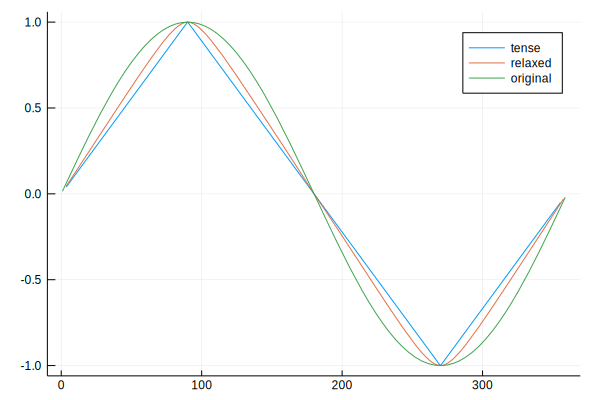

In [15]:
#przyklad4
X=[0,90,180,270,360]
n=4
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
plot(Sr, 0, 360, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 360, label="relaxed")
plot!(f, 0, 360, label="original")

BigFloat[1.99556e+01, 2.22222e-02, 1.99444e+01, 3.33333e-02, 1.995e+01, 1.66667e-02, 1.99722e+01, 1.11111e-02, 1.99389e+01, 5.0e-02, 1.99357e+01]
BigFloat[1.55605e-01, 2.00001e-02, 1.44966e-01, 2.33512e-02, 1.50498e-01, 1.61709e-02, 1.72223e-01, 1.10864e-02, 1.4262e-01, 2.24279e-02, 1.39446e-01]


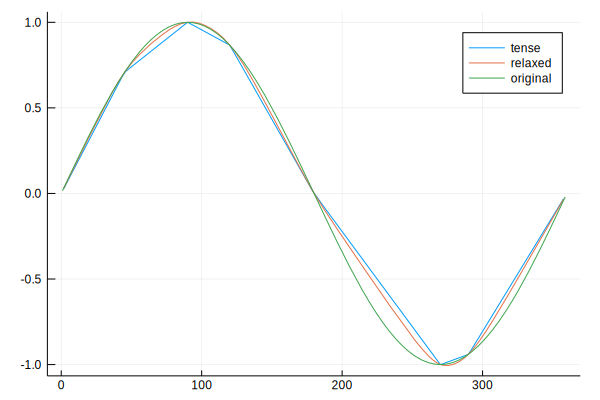

In [16]:
#przyklad5
X=[0,45,90,120,180,270,290,360]
n=7
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
plot(Sr, 0, 360, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 360, label="relaxed")
plot!(f, 0, 360, label="original")

BigFloat[1.99556e+01, 2.22222e-02, 1.99444e+01, 3.33333e-02, 1.995e+01, 1.66667e-02, 1.99722e+01, 1.11111e-02, 1.99389e+01, 5.0e-02, 1.99357e+01, 1.42857e-02, 1.99829e+01]
BigFloat[1.55605e-01, 2.00001e-02, 1.44966e-01, 2.33512e-02, 1.50498e-01, 1.61709e-02, 1.72223e-01, 1.10864e-02, 1.4262e-01, 2.24279e-02, 1.39446e-01, 1.41033e-02, 1.82937e-01]


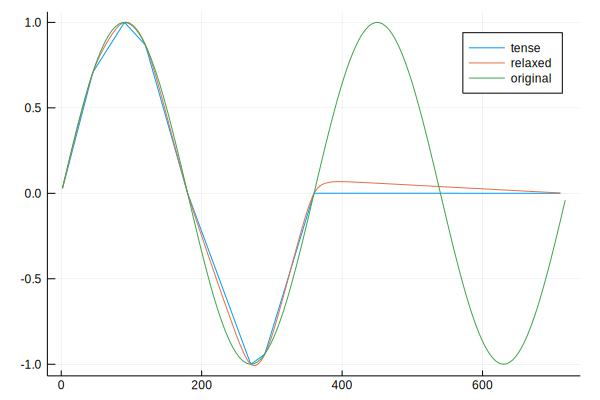

In [17]:
#przyklad4
X=[0,45,90,120,180,270,290,360,720]
n=8
M=Array{BigFloat,1}(undef, n+1)
r=10
fillM()
plot(Sr, 0, 720, label="tense")
r=0.1
fillM()
plot!(Sr, 0, 720, label="relaxed")
plot!(f, 0, 720, label="original")